In [3]:
import pandas as pd
df = pd.read_csv("heights.csv")
df

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [5]:
Q1, Q3 = df.height.quantile([0.25, 0.75])
Q1, Q3

(5.3500000000000005, 6.275)

In [6]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [8]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower, upper

(3.962500000000001, 7.6625)

In [10]:
#to find outliers
df[(df.height > upper) | (df.height < lower)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [13]:
df_noOutlier = df[(df.height < upper) & (df.height > lower)]
df_noOutlier

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


Using box plot

In [15]:
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [16]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [20]:
df_apac = df[df.Region == "APAC"]
df_europe = df[df.Region == "Europe"]
df_americas = df[df.Region == "Americas"]

df_apac

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956
5,June,2022,APAC,38143
6,July,2022,APAC,29132
7,August,2022,APAC,21961
8,September,2022,APAC,33299
9,October,2022,APAC,37279


In [21]:
def get_iqr_deets(data):
    q1, q3 = data.Sales.quantile([0.25, 0.75])
    iqr = q3 - q1
    Lower = q1 - 1.5*iqr
    Upper = q3 + 1.5*iqr
    return Lower, Upper

In [22]:
get_iqr_deets(df_apac)

(-737.125, 59747.875)

In [24]:
df_apac.Sales.describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [25]:
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [29]:
labels = df.Region.unique()

In [30]:
plot_data = [df['Sales'][df['Region'] == label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

In [31]:
from matplotlib import pyplot as plt

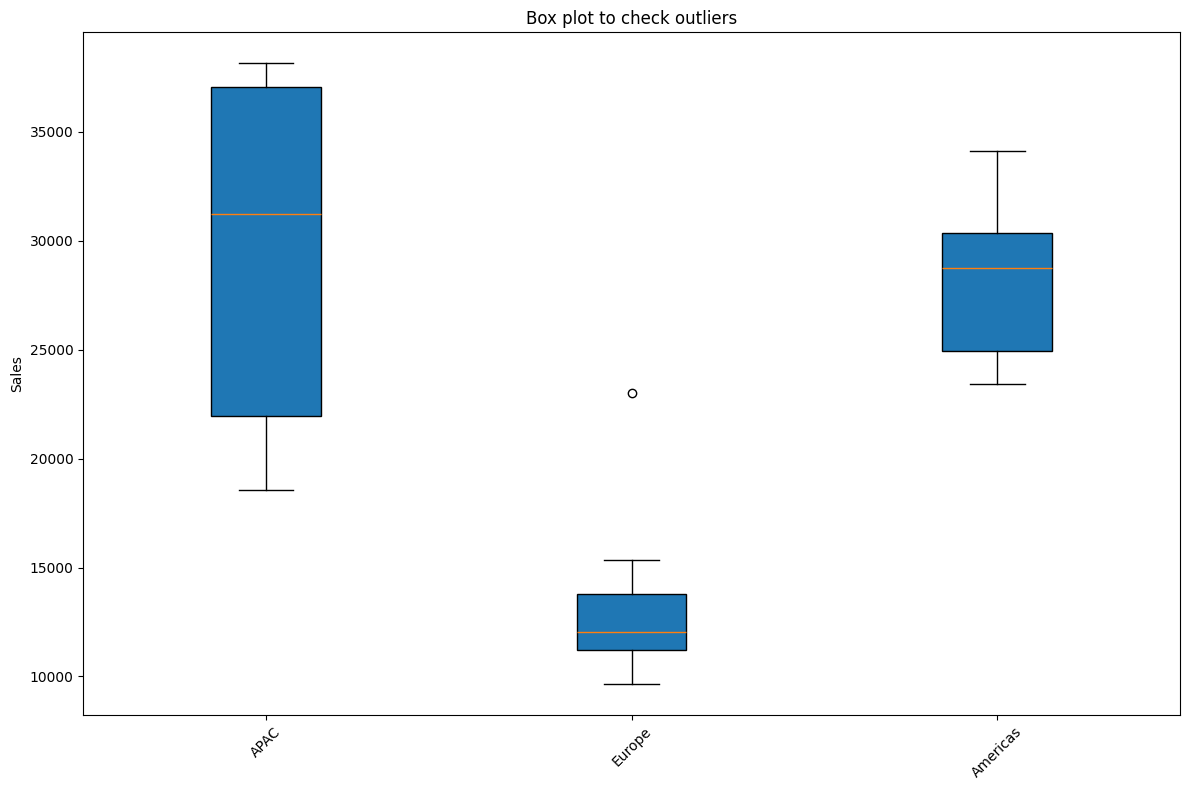

In [36]:
plt.figure(figsize= (12, 8))
plt.boxplot(plot_data, labels= labels, vert= True, patch_artist= True)
plt.title("Box plot to check outliers")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()